<a href="https://colab.research.google.com/github/emmim25/Group08_Project/blob/main/BMEN415_Group8_Final_Project_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Dataset Modelling

https://github.com/emmim25/Group08_Project Link to GitHub


In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn
import os

data = pd.read_csv('https://raw.githubusercontent.com/emmim25/Group08_Project/main/Regression_QSAR_Bioconcentration.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       779 non-null    object 
 1   SMILES    779 non-null    object 
 2   Set       779 non-null    object 
 3   nHM       779 non-null    int64  
 4   piPC09    779 non-null    float64
 5   PCD       779 non-null    float64
 6   X2Av      779 non-null    float64
 7   MLOGP     779 non-null    float64
 8   ON1V      779 non-null    float64
 9   N-072     779 non-null    int64  
 10  B02[C-N]  779 non-null    int64  
 11  F04[C-O]  779 non-null    int64  
 12  Class     779 non-null    int64  
 13  logBCF    779 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 85.3+ KB


Data Pre-Processing and Feature Addition

In [ ]:
data.drop(['SMILES'], axis = 1, inplace = True)

#Dropping Class, Set, and CAS Code 
data.drop(['Set'], axis=1, inplace=True)
data.drop(['CAS'], axis=1, inplace=True)
data.drop(['Class'], axis=1, inplace=True)

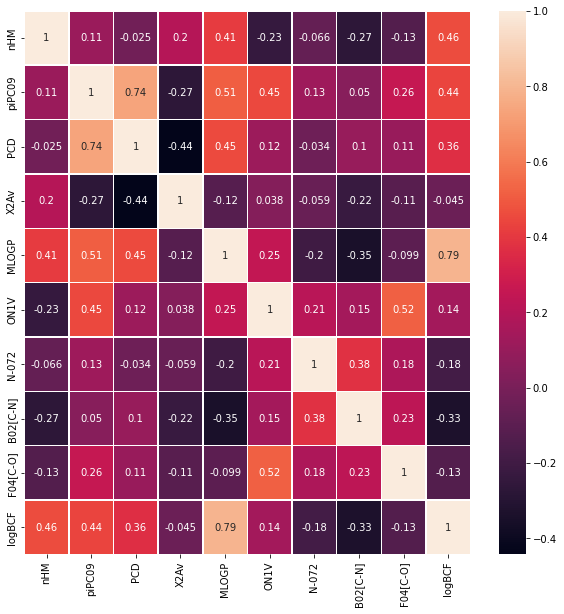

In [ ]:
data.corr()
fig, axes = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()


Data Splitting (80% Train, 20% Test) 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_squared_error  
from math import sqrt  
from sklearn.preprocessing import StandardScaler 

x = data.drop(['logBCF'], axis =1)
y = data.logBCF.values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Yousef's Regression Models

Mean Square Error: 0.5516033804986403
Root Mean Square Error: 0.742700060925432
R^2: 0.688887059385689


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Random Forest Model')

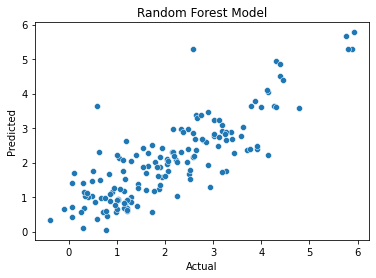

In [ ]:
# 1. Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

rfr = RandomForestRegressor(random_state=5) ##Creating a model object of type Random forest regressor
rfr.fit(x_train,y_train)    #Training the model

y_predict_test = rfr.predict(x_test)   #Predicted Values

mse = mean_squared_error(y_test,y_predict_test,squared=True) #Returns MSE
rmse = mean_squared_error(y_test,y_predict_test,squared=False) #Returns RMSE
r2 = r2_score(y_test,y_predict_test)  ## Returns R2 value


print('Mean Square Error:',mse)
print('Root Mean Square Error:',rmse)
print('R^2:',r2)

sns.scatterplot(y_test,y_predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Random Forest Model")


Mean Square Error: 0.649707232957621
Root Mean Square Error: 0.8060441879683898
R^2: 0.6335549510209519


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bagged Forest Model')

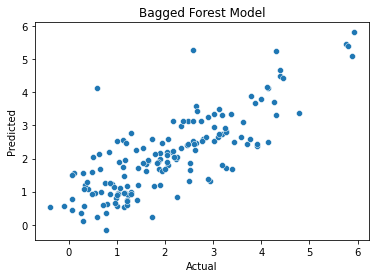

In [ ]:
#2. Bagged Forest
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

bfr = BaggingRegressor(random_state=5)
bfr.fit(x_train,y_train)

y_predict_test = bfr.predict(x_test)

mse = mean_squared_error(y_test,y_predict_test,squared=True) #Returns MSE
rmse = mean_squared_error(y_test,y_predict_test,squared=False) #Returns RMSE
r2 = r2_score(y_test,y_predict_test)  ## Returns R2 value
#acc = accuracy_score(y_test,y_predict_test)   #Accuracy for classification

print('Mean Square Error:',mse)
print('Root Mean Square Error:',rmse)
print('R^2:',r2)

sns.scatterplot(y_test,y_predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Bagged Forest Model")

Mean Square Error: 0.5336671257870947
Root Mean Square Error: 0.7305252396646503
R^2: 0.699003387791566


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Support Vector Regression Model')

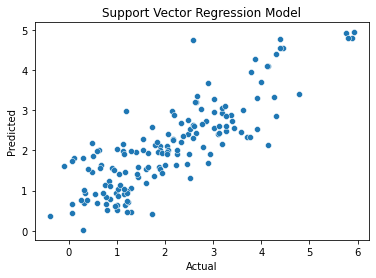

In [ ]:
#3. Support Vector Regression

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

svr = SVR(kernel='rbf')
svr.fit(x_train,y_train)

y_predict_test = svr.predict(x_test)

mse = mean_squared_error(y_test,y_predict_test,squared=True) #Returns MSE
rmse = mean_squared_error(y_test,y_predict_test,squared=False) #Returns RMSE
r2 = r2_score(y_test,y_predict_test)  ## Returns R2 value
#acc = accuracy_score(y_test,y_predict_test)   #Accuracy for classification

print('Mean Square Error:',mse)
print('Root Mean Square Error:',rmse)
print('R^2:',r2)

sns.scatterplot(y_test,y_predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Support Vector Regression Model")

Emily's Regression Models

Test Accuracy for Bayesian Ridge Model:  0.6161874286084641
RMSE for Testing Data:  0.8249241527747122


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bayesian Ridge Model')

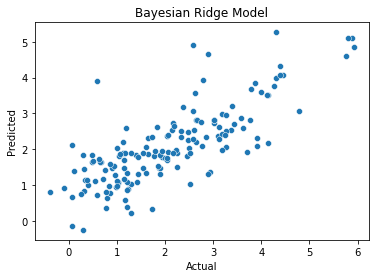

In [ ]:
#Bayesian Ridge Regression Model
from sklearn.linear_model import BayesianRidge

BR=BayesianRidge(n_iter=200)
BR.fit(x_train,y_train)

y_predict_test = BR.predict(x_test)

accuracy_BR_test = r2_score(y_test, y_predict_test)
print("Test Accuracy for Bayesian Ridge Model: ", accuracy_BR_test)

RMSE_BR_test = sqrt(mean_squared_error(y_test,y_predict_test))
print("RMSE for Testing Data: ", RMSE_BR_test)

sns.scatterplot(y_test,y_predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Bayesian Ridge Model")

(array([0]),)
3


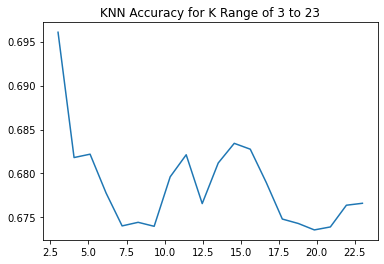

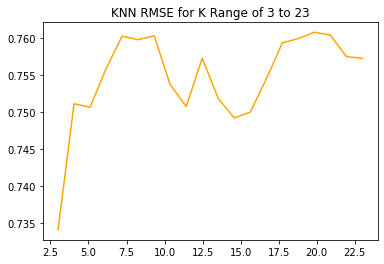

In [ ]:
# K Nearest Neighbors Model
from sklearn import neighbors

accuracy_kNN = np.zeros(20)
RMSE_kNN=np.zeros(20)
for i in range(3,23): 
  kNN_data = neighbors.KNeighborsRegressor(i, weights = 'distance')

  kNN_data.fit(x_train, y_train)

  y_predict_test = kNN_data.predict(x_test)

  accuracy_kNN_test = r2_score(y_test, y_predict_test)
  accuracy_kNN[i-3]=accuracy_kNN_test
  RMSE_kNN[i-3] = sqrt(mean_squared_error(y_test, y_predict_test))

kspan = np.linspace(3,23, num=20 )
plt.figure(0)
plt.title('KNN Accuracy for K Range of 3 to 23')
plt.plot(kspan, accuracy_kNN)
plt.figure(1)
plt.plot(kspan, RMSE_kNN, color='orange')
plt.title('KNN RMSE for K Range of 3 to 23')

k_optimum_index = np.where(accuracy_kNN == np.max(accuracy_kNN))
print(k_optimum_index)
k_optimum = 0 + 3 
print(k_optimum)

kNN_data = neighbors.KNeighborsRegressor(k_optimum, weights = 'distance')
kNN_data.fit(x_train, y_train)
y_predict_test = kNN_data.predict(x_test)

Testing Accuracy for K Nearest Neighbors Model:  0.6960631667400236
RMSE for Testing Data:  0.7340845584837142


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted')

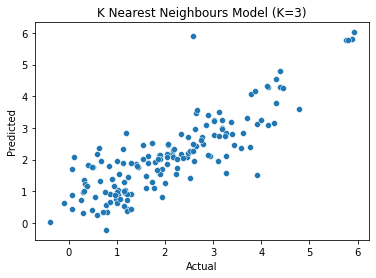

In [ ]:
accuracy_kNN_test = r2_score(y_test, y_predict_test)
print("Testing Accuracy for K Nearest Neighbors Model: ", accuracy_kNN_test)

RMSE_kNN_test = sqrt(mean_squared_error(y_test, y_predict_test))
print("RMSE for Testing Data: ", RMSE_kNN_test)

sns.scatterplot(y_test, y_predict_test)
plt.title("K Nearest Neighbours Model (K=3)")
plt.xlabel('Actual')
plt.ylabel('Predicted')

Testing Accuracy for Neural Network Model:  0.6866614742542492
RMSE for Testing Data:  0.745351825593272


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted')

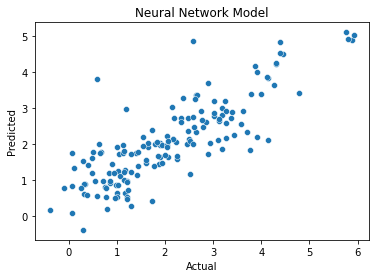

In [ ]:
#Neural Network Model
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(random_state = 50, max_iter = 800, activation='relu', solver='adam').fit(x_train, y_train)

y_predict_mlp_test = MLP.predict(x_test)

accuracy_mlp_test = r2_score(y_test, y_predict_mlp_test)
print("Testing Accuracy for Neural Network Model: ", accuracy_mlp_test)

RMSE_mlp_test = sqrt(mean_squared_error(y_test, y_predict_mlp_test))
print("RMSE for Testing Data: ", RMSE_mlp_test)

sns.scatterplot(y_test,y_predict_mlp_test)
plt.title('Neural Network Model')
plt.xlabel("Actual")
plt.ylabel('Predicted')

Ethan's Regression Models

Test Accuracy for Ridge Model:  0.6157286266278055
RMSE for Testing Data:  0.8254170545515217


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Ridge Regression Model')

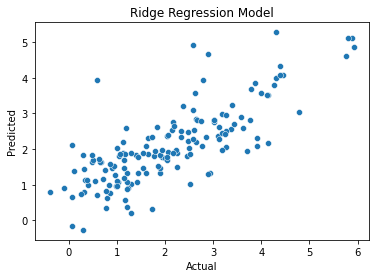

In [ ]:
# Ridge Model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2


ridge = Ridge(alpha = 1.0)
ridge.fit(x_train,y_train)

y_pred = ridge.predict(x_test)

accuracy_test = r2_score(y_test, y_pred)
print("Test Accuracy for Ridge Model: ", accuracy_test)

RMSE_test = sqrt(mean_squared_error(y_test,y_pred))
print("RMSE for Testing Data: ", RMSE_test)

sns.scatterplot(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ridge Regression Model")

Test Accuracy Linear Regression Model:  0.6156404110085313
RMSE for Testing Data:  0.8255117929359151


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Linear Regression Model')

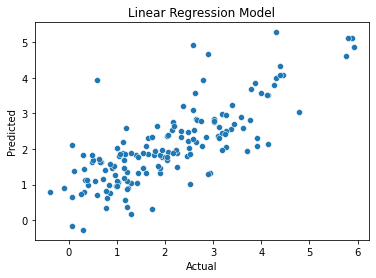

In [ ]:
# MLR
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)

y_pred = LR.predict(x_test)

accuracy_test = r2_score(y_test, y_pred)
print("Test Accuracy Linear Regression Model: ", accuracy_test)

RMSE_test = sqrt(mean_squared_error(y_test,y_pred))
print("RMSE for Testing Data: ", RMSE_test)

sns.scatterplot(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression Model")

Test Accuracy Linear Regression Model:  0.6043917772291938
RMSE for Testing Data:  0.8375043599365973


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AdaBoost Model')

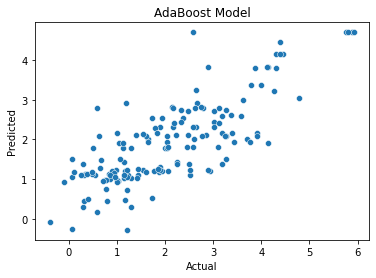

In [ ]:
# AdaBoost Model
from sklearn.ensemble import AdaBoostRegressor as ABR

adaboost = ABR(random_state = 0, n_estimators = 100)
adaboost.fit(x_train,y_train)

y_pred = adaboost.predict(x_test)

accuracy_test = r2_score(y_test, y_pred)
print("Test Accuracy Linear Regression Model: ", accuracy_test)

RMSE_test = sqrt(mean_squared_error(y_test,y_pred))
print("RMSE for Testing Data: ", RMSE_test)

sns.scatterplot(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("AdaBoost Model")

Aliaa's Regression Models

r^2 on test data :  0.6154222190633079
RMSE for Testing Data:  0.8257460715565557


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SGD Regression Model')

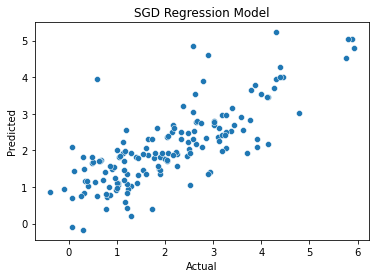

In [ ]:
# Stochastic Gradient Descent Model
from sklearn.linear_model import SGDRegressor

SGDR = SGDRegressor(max_iter=10e5, alpha=1e-10)

SGDR.fit(x_train, y_train)
y_predict = SGDR.predict(x_test)
r2_score_ = r2_score(y_test, y_predict)
print("r^2 on test data : ", r2_score_)

RMSE_test = sqrt(mean_squared_error(y_test, y_predict))
print("RMSE for Testing Data: ", RMSE_test)
sns.scatterplot(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("SGD Regression Model")

In [ ]:
#PLS Regression 
from sklearn.cross_decomposition import PLSRegression 
pls = PLSRegression(n_components=9)
pls.fit(x_train, y_train)
y_predict = pls.predict(x_test)

r2_score_ = r2_score(y_test, y_predict)
print("r^2 on test data : ", r2_score_)

RMSE_test = sqrt(mean_squared_error(y_test, y_predict))
print("RMSE for Testing Data: ", RMSE_test)
#sns.scatterplot(y_test, y_predict)
#plt.xlabel('Actual')
#plt.ylabel('Predicted')
#plt.title("PLS Regression Model")

r^2 on test data :  0.6156404110085314
RMSE for Testing Data:  0.8255117929359149


r^2 on test data :  0.653484245426075
RMSE for Testing Data:  0.7838192299343444


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SGD Regression Model')

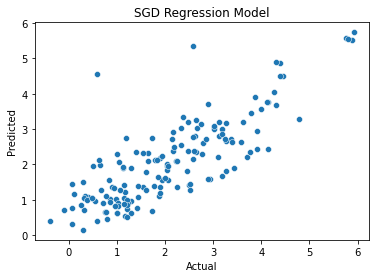

In [ ]:
# Gradient Boosted Tree Regression 
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_predict = GBR.predict(x_test)

r2_score_ = r2_score(y_test, y_predict)
print("r^2 on test data : ", r2_score_)

RMSE_test = sqrt(mean_squared_error(y_test, y_predict))
print("RMSE for Testing Data: ", RMSE_test)
sns.scatterplot(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("SGD Regression Model")



##Classification Modelling

In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn
import os

data = pd.read_csv('https://raw.githubusercontent.com/emmim25/Group08_Project/main/Classification_Diabetes_Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


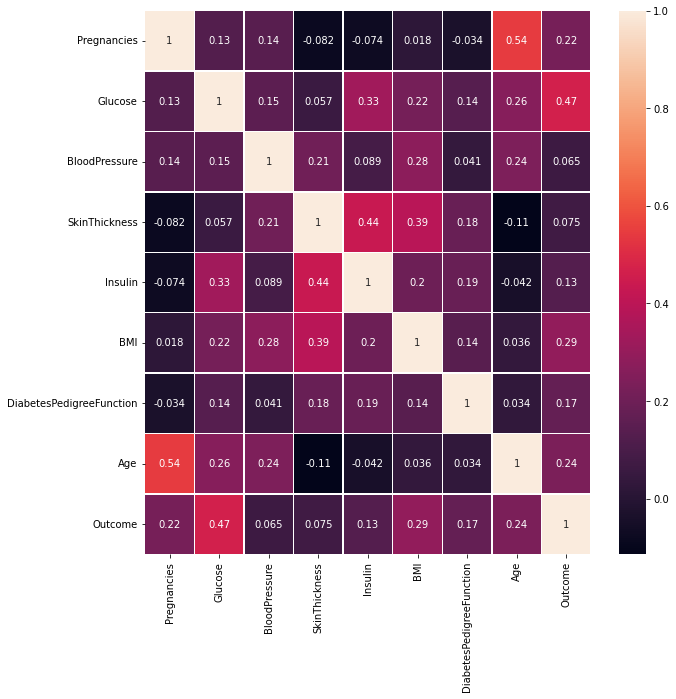

In [ ]:
data.corr()
fig, axes = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

Data Splitting 

In [ ]:
#Resampling 
import imblearn 
from imblearn.under_sampling import RandomUnderSampler

x = data.drop(['Outcome'], axis =1)
y = data.Outcome.values

resample = RandomUnderSampler(random_state=42,replacement=True)
x,y=resample.fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix

Emily's Classification Models 

(array([22, 23, 24]),)
25
Test Accuracy: 0.8240740740740741


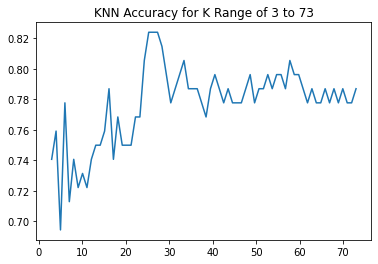

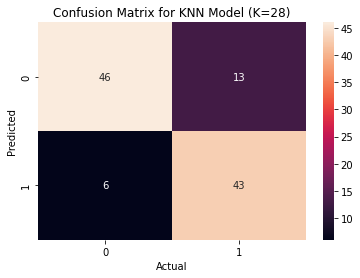

In [ ]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix

accuracy_kNN = np.zeros(70)

for i in range(3,73): 
  kNN = neighbors.KNeighborsClassifier(i, weights = 'uniform')

  kNN.fit(x_train, y_train)

  y_predict_test = kNN.predict(x_test)
  actual_test = y_test
  predicted_test = y_predict_test 
  test_matrix = confusion_matrix(actual_test, predicted_test)
  accuracy_kNN[i-3] = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])

k=np.linspace(3,73,num=70)
plt.figure(0)
plt.title('KNN Accuracy for K Range of 3 to 73')
plt.plot(k, accuracy_kNN)


k_optimum_index = np.where(accuracy_kNN == np.max(accuracy_kNN))
print(k_optimum_index)
k_optimum = 22 + 3 
print(k_optimum)

kNN = neighbors.KNeighborsClassifier(k_optimum, weights='uniform')

kNN.fit(x_train, y_train)

y_predict_test = kNN.predict(x_test)

actual_test = y_test
predicted_test = y_predict_test 

test_matrix = confusion_matrix(actual_test, predicted_test)
plt.figure(1)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for KNN Model (K=28)")
test_accuracy_kNN = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_kNN)

Test Accuracy: 0.8148148148148148


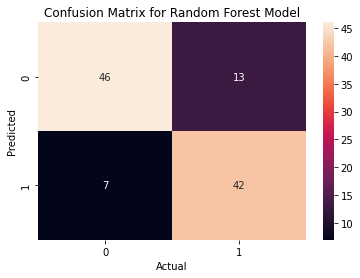

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 1200, max_depth = 30)

forest.fit(x_train, y_train)

y_predict_ens_test = forest.predict(x_test)

actual_test = y_test
predicted_test = y_predict_ens_test 


test_matrix = confusion_matrix(actual_test, predicted_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for Random Forest Model")
test_accuracy_RF = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_RF)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test Accuracy: 0.7870370370370371


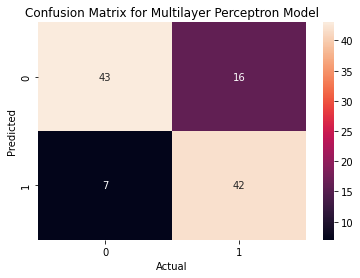

In [ ]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(random_state = 0, max_iter = 1000, activation='relu', solver='adam').fit(x_train, y_train)

y_predict_mlp_test = MLP.predict(x_test)

actual_test = y_test
predicted_test = y_predict_mlp_test 

test_matrix = confusion_matrix(actual_test, predicted_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for Multilayer Perceptron Model")
test_accuracy = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy)

Yousef's Classification Models

Test Accuracy: 0.7777777777777778


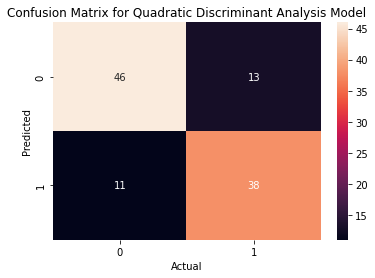

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

qda=QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)

y_predict_test = qda.predict(x_test)

test_matrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for Quadratic Discriminant Analysis Model")
test_accuracy = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.7962962962962963


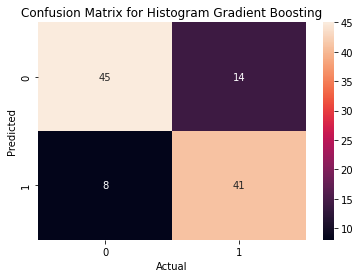

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

y_predict_test = gbc.predict(x_test)

test_matrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for Histogram Gradient Boosting")
test_accuracy_RF = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_RF)

Test Accuracy: 0.7314814814814815


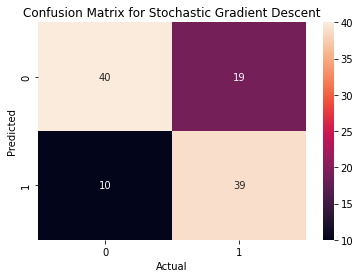

In [ ]:
### Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

sgd=SGDClassifier()
sgd.fit(x_train,y_train)

y_predict_test = sgd.predict(x_test)

test_matrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for Stochastic Gradient Descent")
test_accuracy = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy)

Ethan's Classification Models

Test Accuracy: 0.75


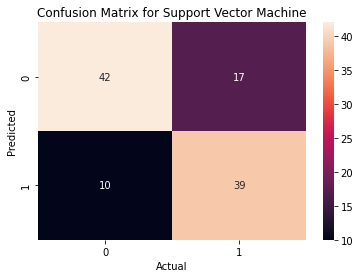

In [ ]:
#Support Vector Machine
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Adjusting development threshold
SVM = make_pipeline(StandardScaler(), SVC(gamma = 'auto'))
SVM.fit(x_train, y_train)

# Predicting the Test set results
y_pred = SVM.predict(x_test)

test_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for Support Vector Machine")
test_accuracy = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.75


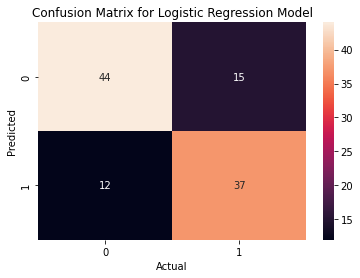

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Adjusting development threshold
logreg_classifier = LogisticRegression(C = 1, penalty = 'none')
logreg_classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = logreg_classifier.predict(x_test)

test_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for Logistic Regression Model")
test_accuracy = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.6492537313432836


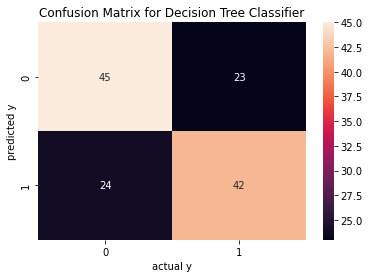

In [ ]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Feature Scaling

# Adjusting development threshold
tree = DecisionTreeClassifier(max_depth = 10, max_features = 4, min_samples_split = 5, random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=42)
tree.fit(x_train, y_train)


# Predicting the Test set results
y_pred = tree.predict(x_test) 

test_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.title("Confusion Matrix for Decision Tree Classifier")
test_accuracy = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy)

Haniya's Classificaiton Models are avilaable at:

https://github.com/haniya0105/BMEN415

Aliaa's Classification models


Test Accuracy: 0.6417910447761194


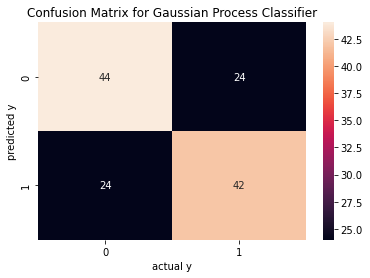

In [ ]:
# Gaussian Process Classifier

from sklearn.gaussian_process import GaussianProcessClassifier

GPC = GaussianProcessClassifier()
GPC.fit(x_train, y_train)
y_predict = GPC.predict(x_test)

test_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.title("Confusion Matrix for Gaussian Process Classifier")
test_accuracy = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.5373134328358209


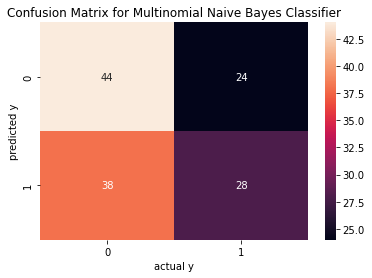

In [ ]:
# Multinomial classifier
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(x_train, y_train)

y_predict = MNB.predict(x_test)

test_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.title("Confusion Matrix for Multinomial Naive Bayes Classifier")
test_accuracy = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy)


Test Accuracy: 0.7313432835820896


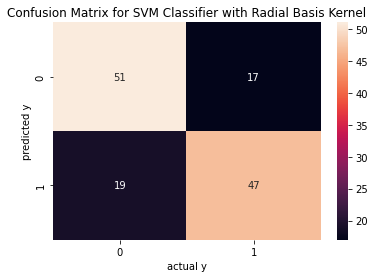

In [ ]:
# Support Vector machine RBF Kernel 

import numpy as np
from sklearn import svm

clf = svm.SVC(kernel='rbf')

clf.fit(x_train, y_train)
y_predict = clf.predict (x_test)

test_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.title("Confusion Matrix for SVM Classifier with Radial Basis Kernel")
test_accuracy = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy)